In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

(724, 604)
(100, 2)
(437296, 2)


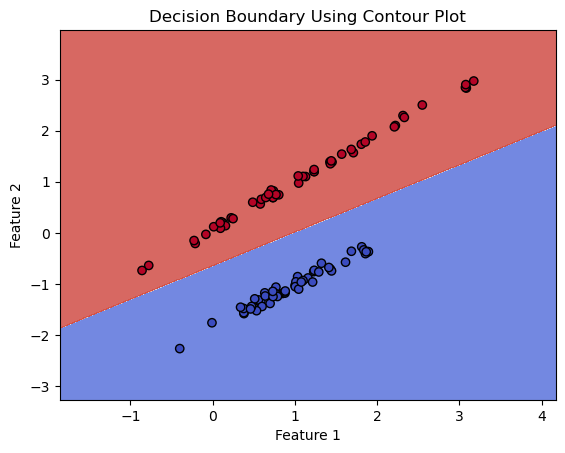

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

# Create a sample dataset (you should replace this with your own data)
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Train a classifier (replace with your own classifier)
clf = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42)
clf.fit(X, y)

# Define a grid of points covering the input space (as shown in previous responses)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Use the classifier to make predictions on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = clf.predict(grid_points)
print(xx.shape)
print(X.shape)
print(grid_points.shape)
# Reshape predictions to match the shape of xx and yy
predictions = predictions.reshape(xx.shape)

# Plot the decision boundary using a contour plot
plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Using Contour Plot')
plt.show()


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

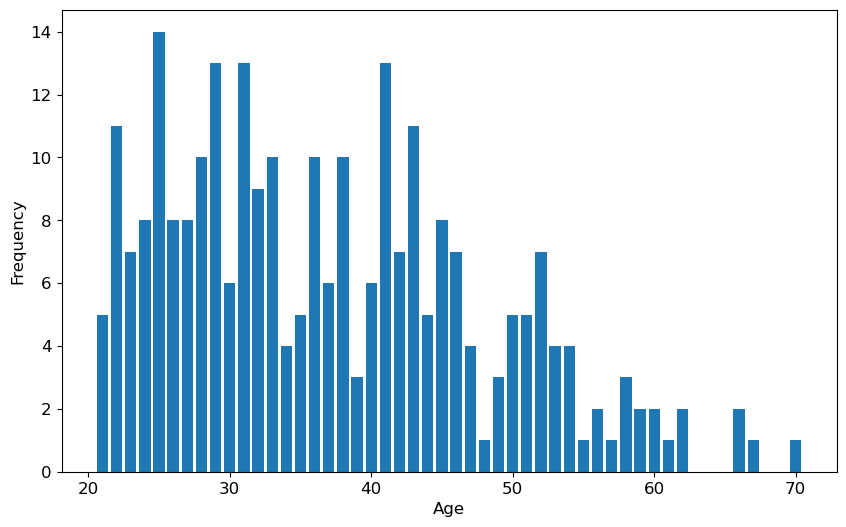

In [35]:
# Positive case distribution

x = df.loc[df['Outcome']==1]['Age'].value_counts().index
y = df.loc[df['Outcome']==1]['Age'].value_counts().values

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [64]:
df_scaled = pd.read_csv('diabetes_scaled.txt', sep=' ', header=None).drop(columns=[9])
label = df_scaled.loc[:, 0].to_numpy()
fn_1 = lambda x: x.str[2:].astype('float32')
df_scaled = df_scaled.loc[:, 1:].apply(fn_1, axis=1)
X = df_scaled.to_numpy()
Y = label



from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {
            'data': self.data[idx],
            'target': self.targets[idx]
        }
        return sample



custom_dataset = CustomDataset(X, Y)
batch_size = 16
custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)


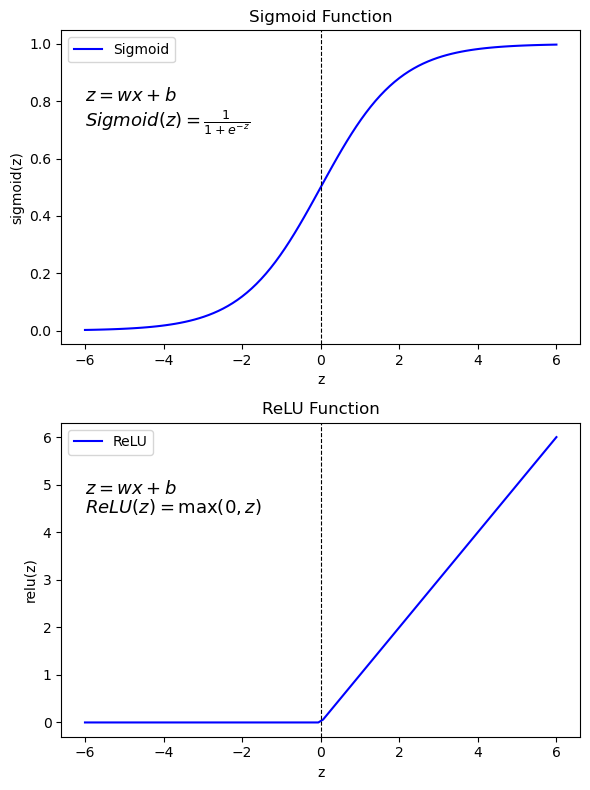

In [34]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))



# Plot the sigmoid function
ax1.plot(x, sigmoid, label='Sigmoid', color='blue')
ax1.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax1.text(-6, 0.8, r'$z = wx + b$', fontsize=13, color='black') 
ax1.text(-6, 0.71, r'$Sigmoid(z) = \frac{1}{1 + e^{-z}}$', fontsize=13, color='black')
ax1.set_title('Sigmoid Function')
ax1.set_xlabel('z')
ax1.set_ylabel('sigmoid(z)')
ax1.legend()

# Plot the ReLU function
ax2.plot(x, relu, label='ReLU', color='blue')
ax2.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax2.text(-6, 4.8, r'$z = wx + b$', fontsize=13, color='black') 
ax2.text(-6, 4.4, r'$ReLU(z) = \max(0, z)$', fontsize=13, color='black')
ax2.set_title('ReLU Function')
ax2.set_xlabel('z')
ax2.set_ylabel('relu(z)')
ax2.legend()

plt.tight_layout()
plt.show()


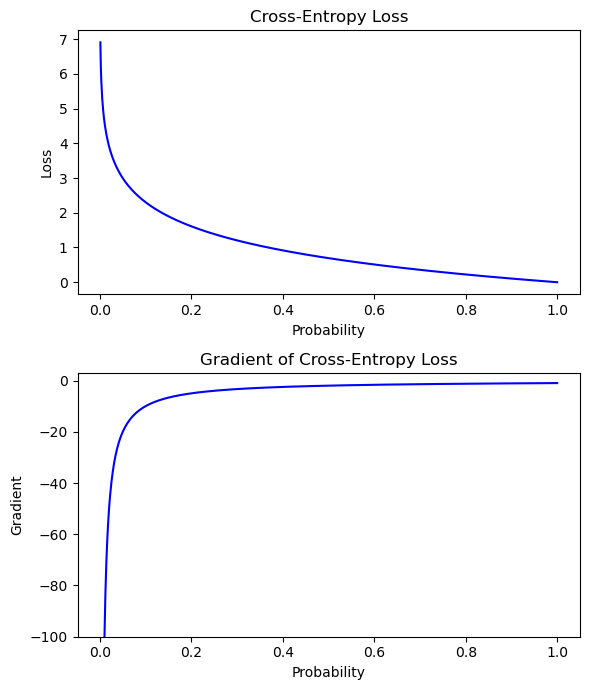

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cross-entropy loss function
def cross_entropy_loss(probs):
    return -np.log(probs)

# Define the gradient of the cross-entropy loss function
def gradient_cross_entropy_loss(probs):
    return -1/probs

pred_probs = np.arange(0.001, 1.001, 0.001)
loss_values = cross_entropy_loss(pred_probs)
gradient_values = gradient_cross_entropy_loss(pred_probs)

# Create a figure with two vertically stacked subplots
plt.figure(figsize=(6, 7))

# Create the plot for the loss
plt.subplot(211)
plt.plot(pred_probs, loss_values, label='Cross-Entropy Loss', color='blue')
plt.xlabel('Probability')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')


# Create the plot for the gradient
plt.subplot(212)
plt.plot(pred_probs, gradient_values, label='Gradient', color='blue')
plt.xlabel('Probability')
plt.ylabel('Gradient')
plt.ylim(-100, 3)
plt.title('Gradient of Cross-Entropy Loss')


plt.tight_layout()
plt.show()



OrderedDict
_rebuild_tensor_v2


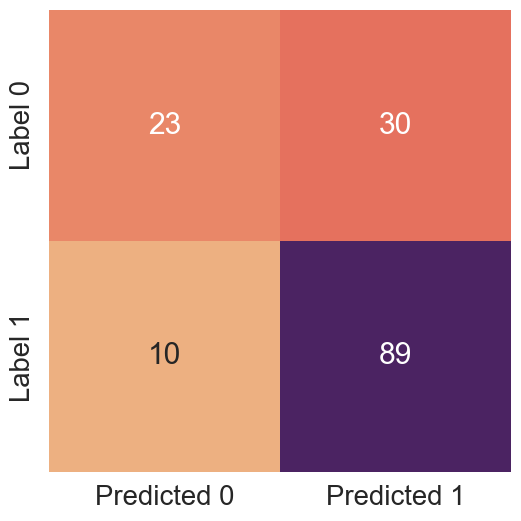

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from classifier import *
from utils import *
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix


test_X = torch.tensor(np.load('test_X.npy'))
test_Y = torch.tensor(np.load('test_Y.npy'))
model = MLP_V2(test_X.shape[1])
model.load_state_dict(torch.load('model_MLP.pth'))
model.to('cpu')
model.eval()



with torch.no_grad():
    y_pred = model(test_X)
    y_pred = torch.round(y_pred)



cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.8)
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Label 0", "Label 1"])

plt.show()

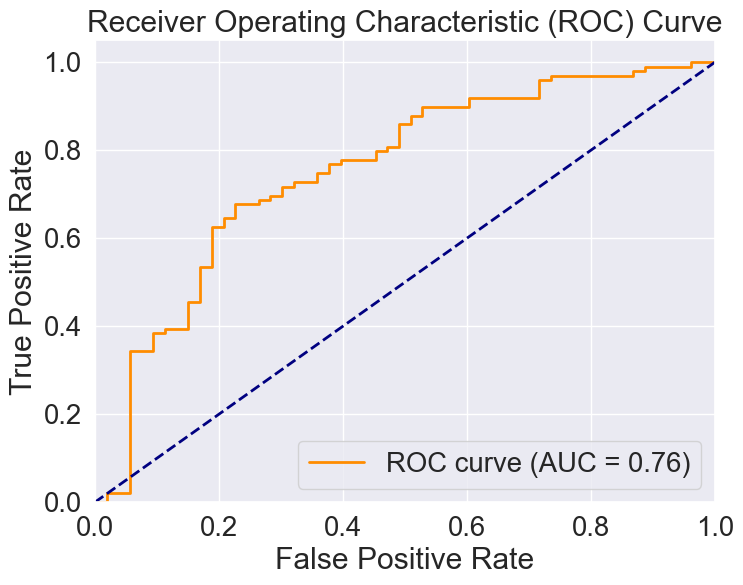

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


with torch.no_grad():
    y_pred = model(test_X)

fpr, tpr, _ = roc_curve(test_Y, y_pred)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()